In [434]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Step 1: Reading and Understanding the Data

In [435]:
# Read the data from csv file
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [437]:
print("Shape : ", df.shape)
print("Null data : ", df.isnull().sum())

Shape :  (730, 16)
Null data :  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


##### Observation 1 : there are no null values

In [438]:
# List down columns
print("Columns : ", df.columns)

Columns :  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


- instant: record index						//index, can be dropped
- dteday : date								//yr, mnth, weekday covers info provided by dteday, it can be dropped
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users						//we have to use only cnt, casual can be dropped
- registered: count of registered users				//we have to use only cnt, registered can be dropped
- cnt: count of total rental bikes including both casual and registered

##### Observation 2 : instant, dteday, casual, registered can be dropped

In [439]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
print("Shape: ", df.shape)
print(df.info())
df.head()

Shape:  (730, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB
None


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Categorical Data Columns
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

#### Continuous Numerical Data Columns
- temp
- atemp
- hum
- windspeed
- cnt

In [440]:
# Convert categorical columns data from int to string
df.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'},inplace = True)
df.mnth = df.mnth.replace({ 1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun',
                            7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'})
df.weekday = df.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'})
df.weathersit.replace({1: 'clear', 2: 'misty', 3: 'light_rain', 4: 'heavy_rain'},inplace = True)
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# Step 2: Data Analysis

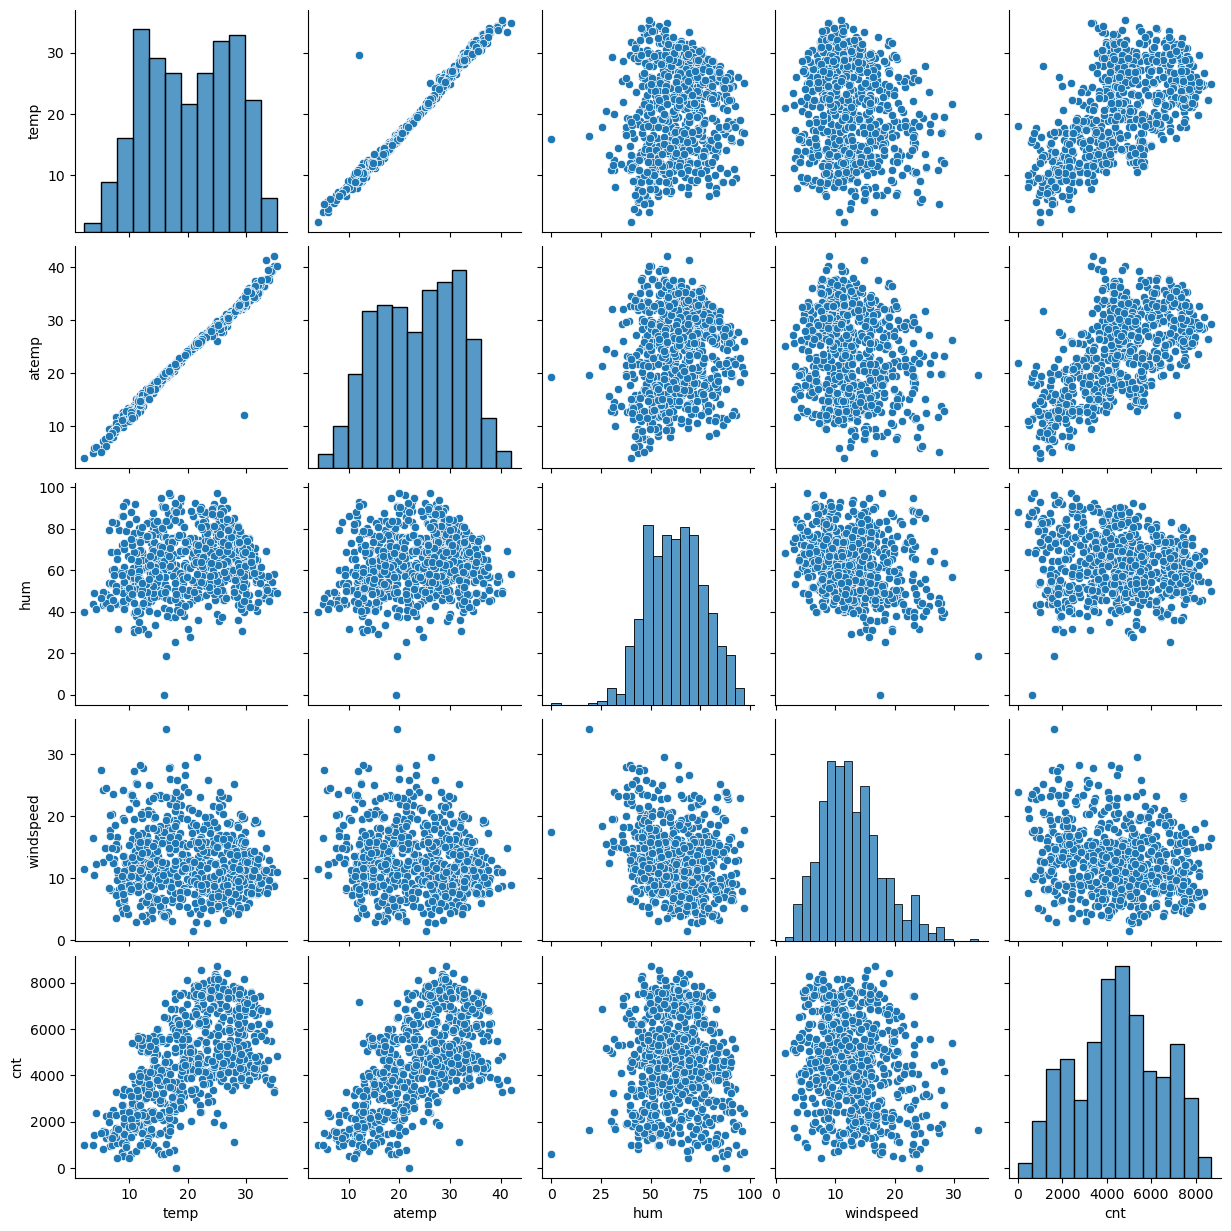

In [441]:
# Pair plots for numerical data
sns.pairplot(data=df,vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

#### Observation 3 : Inference from above plots:
1. atemp and temp are highly corelated, one of them can be removed, we can remove atemp
2. temp/atemp & cnt show some linear relationship

In [442]:
# drop atemp as per previous analysis
df.drop(['atemp'], axis = 1, inplace = True)


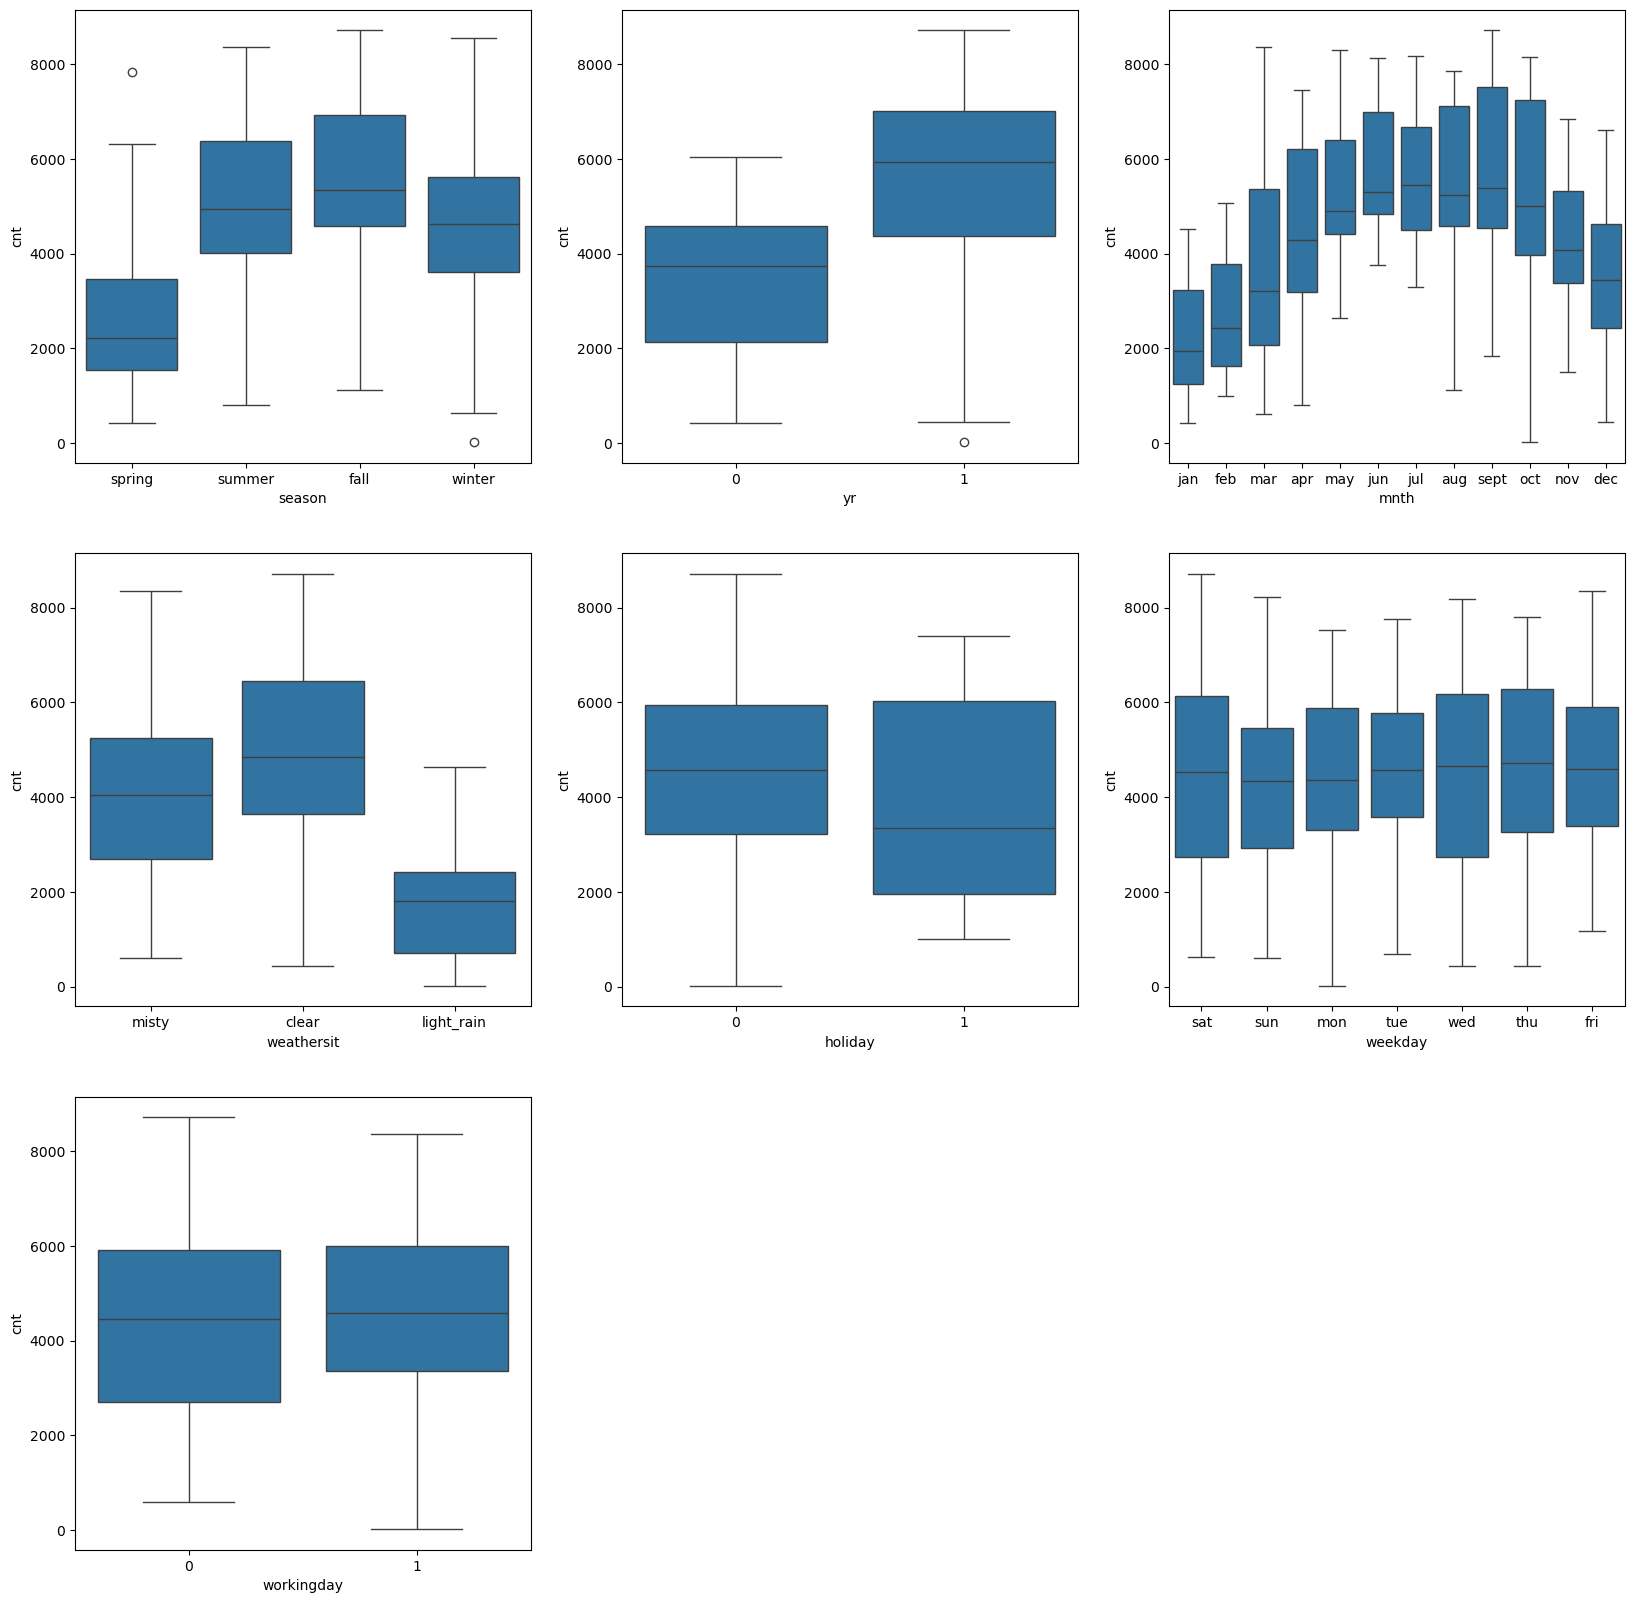

In [443]:
# Categorical Data Plots
plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


#### Adding dummy variables

In [444]:
# Add dummy variables for season, mnth, weekday, weathersit
df = pd.get_dummies(df, drop_first=True)

#### Encoding : converting boolean to int [0, 1]

In [445]:
# Convert boolean columns to 0 or 1
df = df.astype(int)
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain', 'weathersit_misty'],
      dtype='object')

#### Generate Heatmap to get Correlation Coefficients

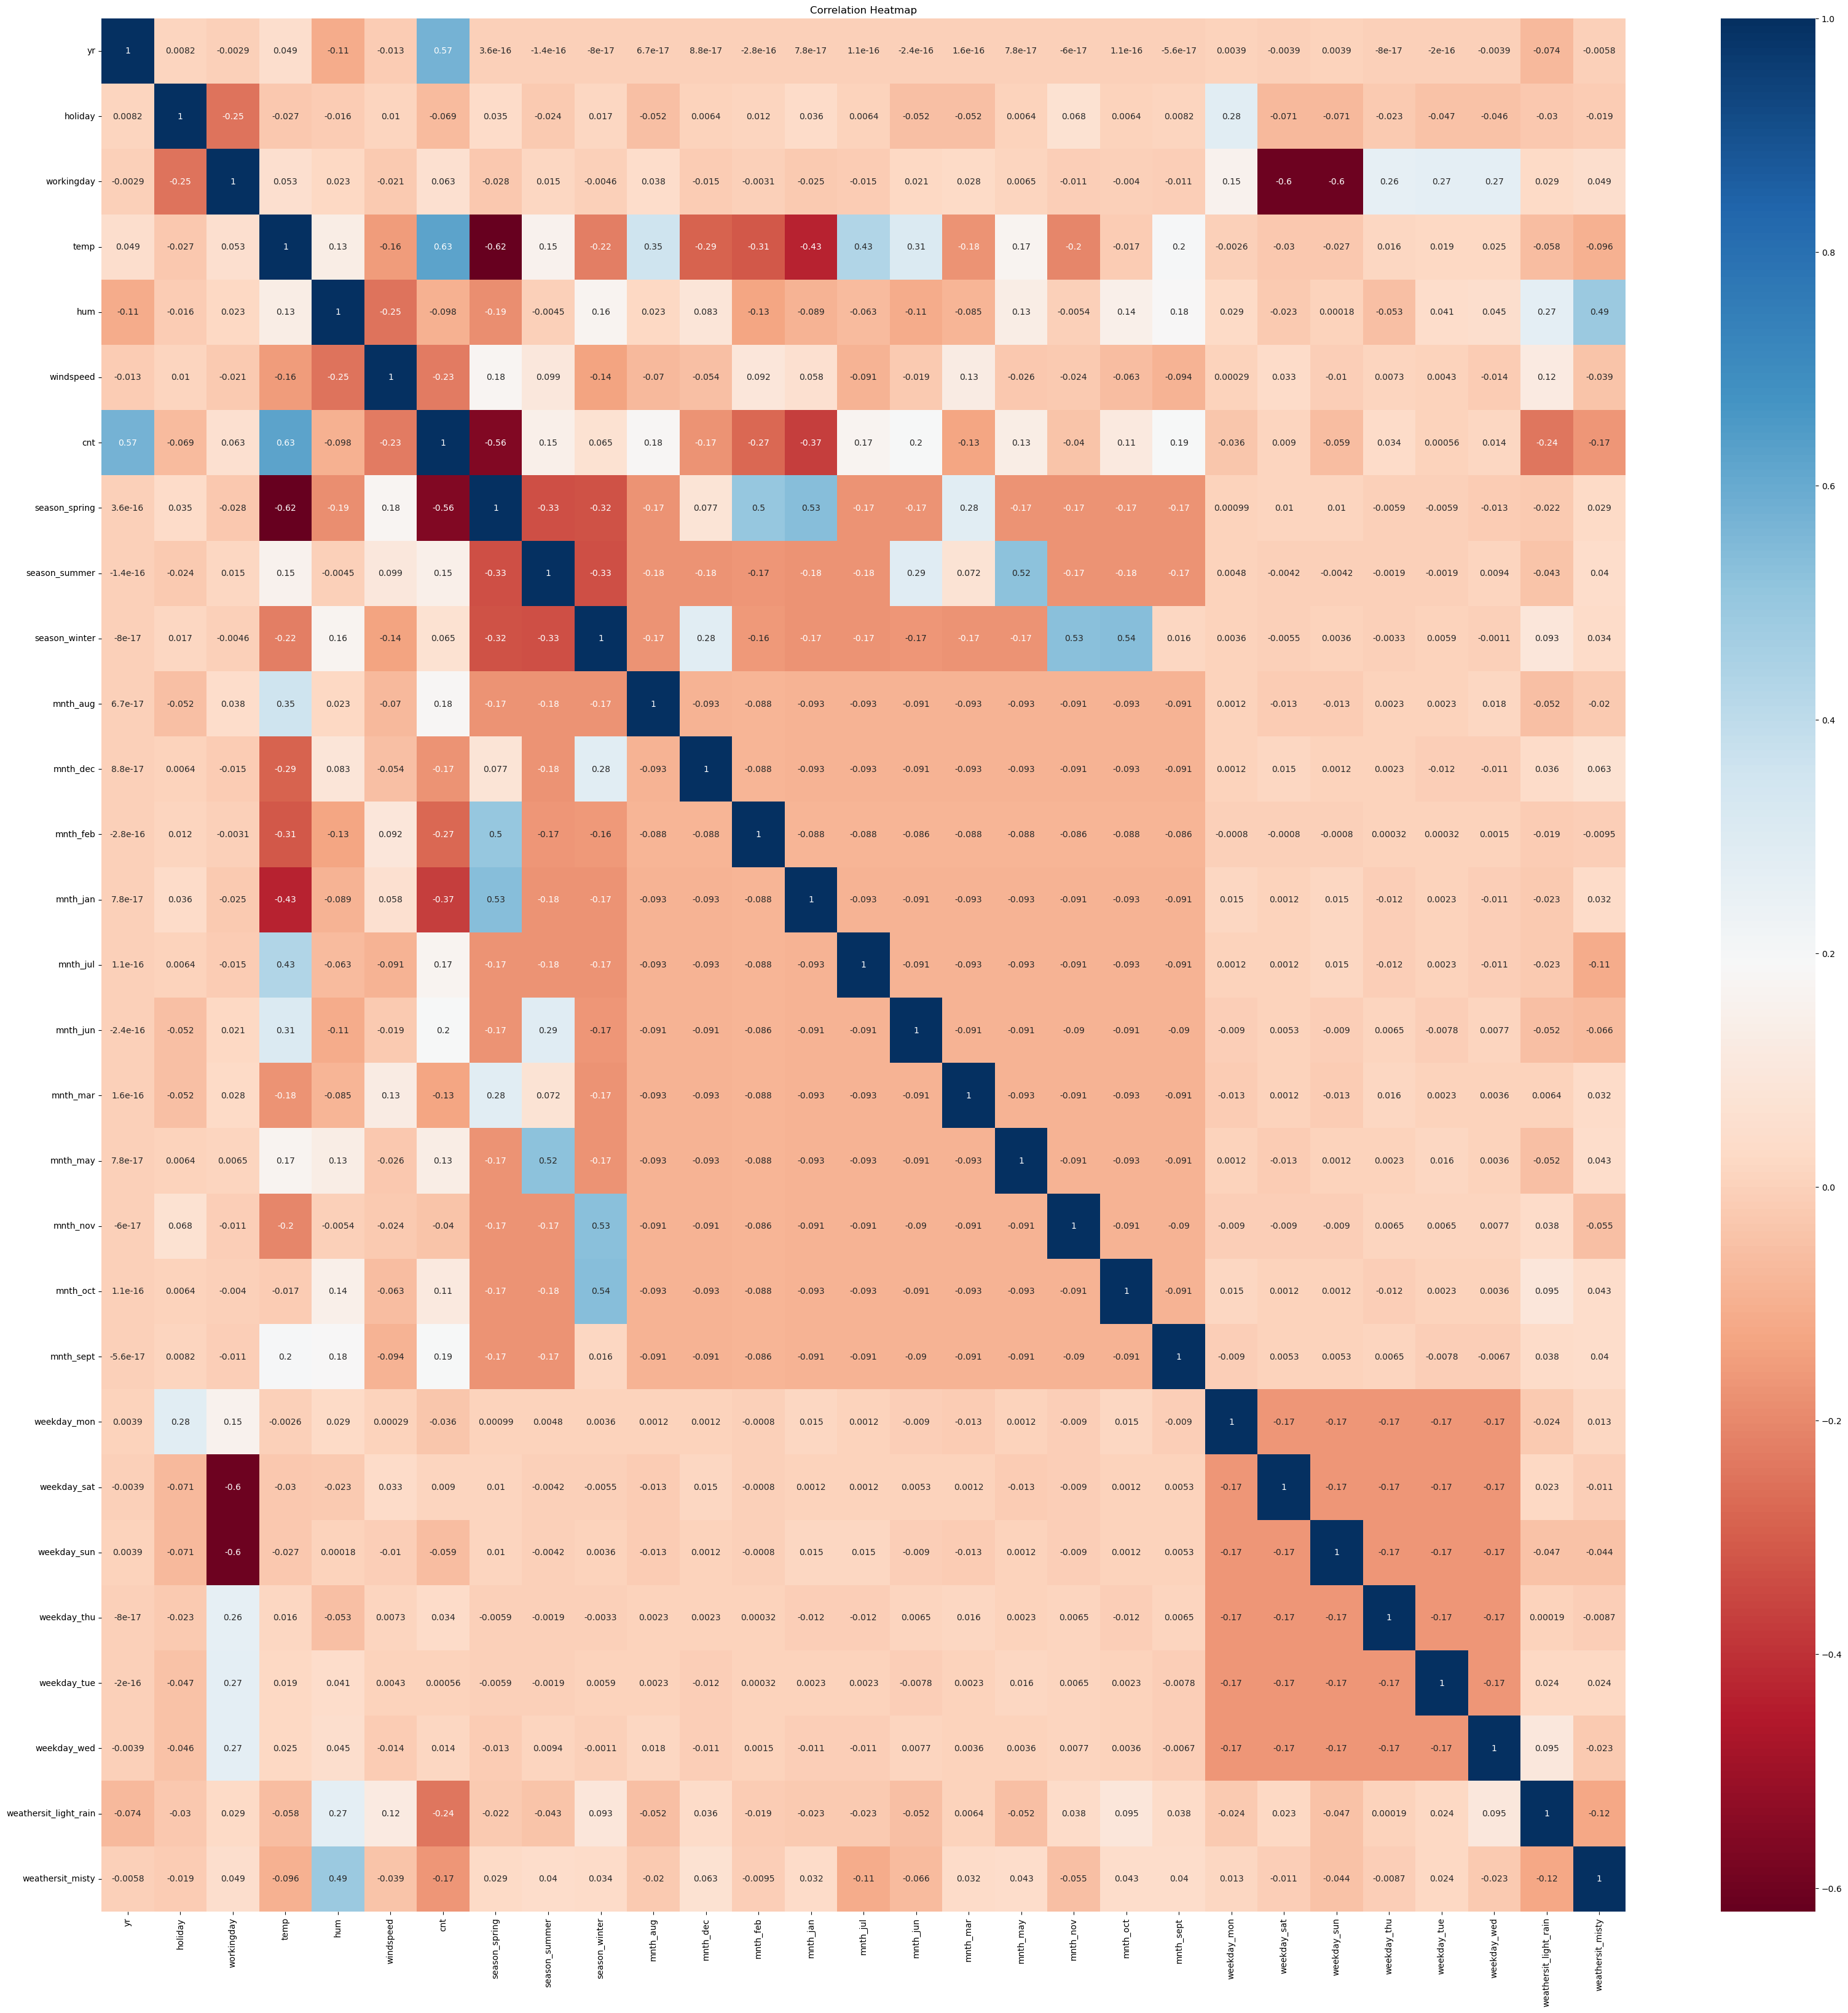

In [446]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()

#### Inferences from above plots:
1. 'clear' weathersit has most bookings and there is no data for heavy_rain, need to check further
2. most number of bookings happened during 'fall' season, followed by 'summer', 'winter' and 'sprint'
3. there were more bookings in 2019 as compared to 2018 (0 means 2018, 1 means 2019)
4. variables showing strong relationship are : yr 0.57, temp 0.63, season_spring -0.56, mnth_jan -0.37

# Step 2: Data Preparation for Modeling



#### Rescaling via Min-Max Scaling

In [447]:
scaler = MinMaxScaler()
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_misty
0,0,0,0,0.363636,0.824742,0.272727,0.110792,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0.363636,0.711340,0.454545,0.089623,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0.181818,0.443299,0.454545,0.152669,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.181818,0.608247,0.272727,0.177174,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0.212121,0.443299,0.333333,0.181546,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Spliting dataset into Train & Test set

In [448]:
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [449]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533393,0.645704,0.343316,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225123,0.145907,0.160465,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.242424,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.649485,0.333333,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.752577,0.424242,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Spliting train data into X_train, Y_train

In [450]:
y_train = df_train.pop('cnt')
x_train = df_train

# Step 3: Create Model

#### Recursive Feature Elimination (RFE) to get initial list of variables

In [451]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)
# running RFE with 15 variables as output
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(x_train, y_train)
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_light_rain', True, 1),
 ('weathersit_misty', True, 1)]

In [452]:
col = x_train.columns[rfe.support_]
X_train_rfe = x_train[col]
print("Top Dependent Variables : ", col)

Top Dependent Variables :  Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_light_rain',
       'weathersit_misty'],
      dtype='object')


#### Helper API

In [453]:
def calc_vif(data):
    vif = pd.DataFrame()
    vif['Variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def get_lm_summary(lm):
    return lm.summary()

def get_statsmodel_summary(x_data, y_data):
    X_sm = sm.add_constant(x_data)
    lm = sm.OLS(y_data, X_sm).fit()
    return get_lm_summary(lm)

#### Model 1 : build model using statsmodel

In [454]:
get_statsmodel_summary(X_train_rfe, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          7.92e-190
Time:                        22:50:49   Log-Likelihood:                 513.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     495   BIC:                            -933.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2587      0.026     10.021      0.000       0.208       0.309
yr                        0.2310      0.008     28.559      0.000       0.215       0.247
holiday                  -0.0039      0.021     -0.183      0.855      -0.046       0.038
workingday                0.0988      0.009     10.616      0.000       0.081       0.117
temp                      0.4594      0.031     14.600      0.000       0.398       0.521
hum                      -0.1429      0.038     -3.799      0.000      -0.217      -0.069
windspeed                -0.1846      0.027     -6.815      0.000      -0.238      -0.131
season_spring            -0.0989      0.015     -6.475      0.000      -0.129      -0.069
season_winter             0.0524      0.012      4.245      0.000       0.028       0.077
mnth_jan                 -0.0417      0.017     -2.389      0.017      -0.076      -0.007
mnth_jul                 -0.0729      0.017     -4.269      0.000      -0.106      -0.039
mnth_sept                 0.0607      0.015      3.943      0.000       0.030       0.091
weekday_sat               0.1087      0.011      9.504      0.000       0.086       0.131
weekday_sun               0.0551      0.012      4.584      0.000       0.031       0.079
weathersit_light_rain    -0.2549      0.026     -9.696      0.000      -0.307      -0.203
weathersit_misty         -0.0595      0.010     -5.675      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       64.074   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.357
Skew:                          -0.639   Prob(JB):                     3.37e-36
Kurtosis:                       5.461   Cond. No.                     1.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.73e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### VIF data for Model 1

In [455]:
calc_vif(X_train_rfe)

,Variables,VIF
2,workingday,42.83
11,weekday_sat,10.45
12,weekday_sun,10.11
3,temp,3.17
6,season_spring,2.72
1,holiday,2.64
4,hum,1.90
7,season_winter,1.81
14,weathersit_misty,1.57
8,mnth_jan,1.55


#### Observation 4
holiday has highest p-value, we can remove it...

# Model 2 : after removing holiday

In [456]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
get_statsmodel_summary(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          7.92e-190
Time:                        22:50:49   Log-Likelihood:                 513.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     495   BIC:                            -933.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2548      0.040      6.301      0.000       0.175       0.334
yr                        0.2310      0.008     28.559      0.000       0.215       0.247
workingday                0.1027      0.026      4.014      0.000       0.052       0.153
temp                      0.4594      0.031     14.600      0.000       0.398       0.521
hum                      -0.1429      0.038     -3.799      0.000      -0.217      -0.069
windspeed                -0.1846      0.027     -6.815      0.000      -0.238      -0.131
season_spring            -0.0989      0.015     -6.475      0.000      -0.129      -0.069
season_winter             0.0524      0.012      4.245      0.000       0.028       0.077
mnth_jan                 -0.0417      0.017     -2.389      0.017      -0.076      -0.007
mnth_jul                 -0.0729      0.017     -4.269      0.000      -0.106      -0.039
mnth_sept                 0.0607      0.015      3.943      0.000       0.030       0.091
weekday_sat               0.1126      0.027      4.165      0.000       0.059       0.166
weekday_sun               0.0590      0.027      2.169      0.031       0.006       0.112
weathersit_light_rain    -0.2549      0.026     -9.696      0.000      -0.307      -0.203
weathersit_misty         -0.0595      0.010     -5.675      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       64.074   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.357
Skew:                          -0.639   Prob(JB):                     3.37e-36
Kurtosis:                       5.461   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF data for Model 2

In [457]:
calc_vif(X_train_new)

,Variables,VIF
3,hum,29.39
2,temp,17.93
1,workingday,17.15
4,windspeed,5.40
10,weekday_sat,4.63
11,weekday_sun,4.50
5,season_spring,3.11
13,weathersit_misty,2.27
6,season_winter,2.17
0,yr,2.09


#### Observation 5
hum has highest VIF, we can remove it...

# Model 3 : after removing hum

In [458]:
X_train_new = X_train_new.drop(["hum"], axis = 1)
get_statsmodel_summary(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.50e-188
Time:                        22:50:50   Log-Likelihood:                 506.14
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     496   BIC:                            -925.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1777      0.035      5.014      0.000       0.108       0.247
yr                        0.2345      0.008     28.789      0.000       0.219       0.251
workingday                0.1034      0.026      3.989      0.000       0.052       0.154
temp                      0.4308      0.031     13.913      0.000       0.370       0.492
windspeed                -0.1564      0.026     -5.924      0.000      -0.208      -0.105
season_spring            -0.1015      0.015     -6.564      0.000      -0.132      -0.071
season_winter             0.0436      0.012      3.544      0.000       0.019       0.068
mnth_jan                 -0.0452      0.018     -2.562      0.011      -0.080      -0.011
mnth_jul                 -0.0660      0.017     -3.835      0.000      -0.100      -0.032
mnth_sept                 0.0576      0.016      3.698      0.000       0.027       0.088
weekday_sat               0.1149      0.027      4.194      0.000       0.061       0.169
weekday_sun               0.0568      0.028      2.064      0.040       0.003       0.111
weathersit_light_rain    -0.2945      0.024    -12.040      0.000      -0.343      -0.246
weathersit_misty         -0.0825      0.009     -9.493      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       66.938   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.645
Skew:                          -0.669   Prob(JB):                     1.45e-37
Kurtosis:                       5.489   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF data for Model 3

In [459]:
calc_vif(X_train_new)

,Variables,VIF
1,workingday,13.66
2,temp,12.69
3,windspeed,5.37
9,weekday_sat,3.90
10,weekday_sun,3.65
4,season_spring,2.87
0,yr,2.07
5,season_winter,1.79
6,mnth_jan,1.64
12,weathersit_misty,1.58


#### Observation 6
workingday has highest VIF, we can remove it...

# Model 4 : after removing workingday

In [460]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)
get_statsmodel_summary(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.7
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.07e-185
Time:                        22:50:50   Log-Likelihood:                 498.09
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     497   BIC:                            -915.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2790      0.025     11.114      0.000       0.230       0.328
yr                        0.2351      0.008     28.434      0.000       0.219       0.251
temp                      0.4310      0.031     13.717      0.000       0.369       0.493
windspeed                -0.1592      0.027     -5.946      0.000      -0.212      -0.107
season_spring            -0.1043      0.016     -6.657      0.000      -0.135      -0.074
season_winter             0.0402      0.012      3.226      0.001       0.016       0.065
mnth_jan                 -0.0462      0.018     -2.580      0.010      -0.081      -0.011
mnth_jul                 -0.0652      0.017     -3.735      0.000      -0.100      -0.031
mnth_sept                 0.0538      0.016      3.411      0.001       0.023       0.085
weekday_sat               0.0154      0.012      1.340      0.181      -0.007       0.038
weekday_sun              -0.0425      0.012     -3.573      0.000      -0.066      -0.019
weathersit_light_rain    -0.2899      0.025    -11.689      0.000      -0.339      -0.241
weathersit_misty         -0.0805      0.009     -9.150      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       80.944   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.976
Skew:                          -0.782   Prob(JB):                     4.65e-48
Kurtosis:                       5.795   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### VIF data for Model 4

In [461]:
calc_vif(X_train_new)

,Variables,VIF
1,temp,5.11
2,windspeed,4.70
3,season_spring,2.32
0,yr,2.07
5,mnth_jan,1.60
11,weathersit_misty,1.53
4,season_winter,1.43
6,mnth_jul,1.36
8,weekday_sat,1.22
9,weekday_sun,1.21


#### Observation 7
weekday_sat has highest p-value, we can remove it...

# Model 5 : after removing weekday_sat

In [462]:
X_train_new = X_train_new.drop(["weekday_sat"], axis = 1)
get_statsmodel_summary(X_train_new, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.69e-186
Time:                        22:50:50   Log-Likelihood:                 497.17
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     498   BIC:                            -919.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2816      0.025     11.246      0.000       0.232       0.331
yr                        0.2347      0.008     28.384      0.000       0.218       0.251
temp                      0.4302      0.031     13.683      0.000       0.368       0.492
windspeed                -0.1576      0.027     -5.887      0.000      -0.210      -0.105
season_spring            -0.1043      0.016     -6.649      0.000      -0.135      -0.073
season_winter             0.0405      0.012      3.251      0.001       0.016       0.065
mnth_jan                 -0.0460      0.018     -2.568      0.011      -0.081      -0.011
mnth_jul                 -0.0646      0.017     -3.699      0.000      -0.099      -0.030
mnth_sept                 0.0539      0.016      3.412      0.001       0.023       0.085
weekday_sun              -0.0454      0.012     -3.867      0.000      -0.068      -0.022
weathersit_light_rain    -0.2896      0.025    -11.672      0.000      -0.338      -0.241
weathersit_misty         -0.0805      0.009     -9.140      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       76.042   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.575
Skew:                          -0.722   Prob(JB):                     4.20e-47
Kurtosis:                       5.822   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [463]:
calc_vif(X_train_new)

,Variables,VIF
1,temp,5.07
2,windspeed,4.66
3,season_spring,2.31
0,yr,2.06
5,mnth_jan,1.60
10,weathersit_misty,1.53
4,season_winter,1.42
6,mnth_jul,1.36
7,mnth_sept,1.20
8,weekday_sun,1.17


#### Observation 8
VIF & p-values are within reasonable range

#### List of final variables

In [464]:
final_col = ['temp', 'windspeed', 'season_spring', 'yr', 'mnth_jan', 'weathersit_misty', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_light_rain']	

# Residual Analysis of the train data

In [465]:
X_sm = sm.add_constant(x_train[final_col])
lm = sm.OLS(y_train, X_sm).fit()
y_train_pred = lm.predict(X_sm)
y_train_pred.head()

653    0.725939
576    0.755970
426    0.471099
728    0.365935
482    0.571897
dtype: float64

In [466]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.69e-186
Time:                        22:50:50   Log-Likelihood:                 497.17
No. Observations:                 510   AIC:                            -970.3
Df Residuals:                     498   BIC:                            -919.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2816      0.025     11.246      0.000       0.232       0.331
temp                      0.4302      0.031     13.683      0.000       0.368       0.492
windspeed                -0.1576      0.027     -5.887      0.000      -0.210      -0.105
season_spring            -0.1043      0.016     -6.649      0.000      -0.135      -0.073
yr                        0.2347      0.008     28.384      0.000       0.218       0.251
mnth_jan                 -0.0460      0.018     -2.568      0.011      -0.081      -0.011
weathersit_misty         -0.0805      0.009     -9.140      0.000      -0.098      -0.063
season_winter             0.0405      0.012      3.251      0.001       0.016       0.065
mnth_jul                 -0.0646      0.017     -3.699      0.000      -0.099      -0.030
mnth_sept                 0.0539      0.016      3.412      0.001       0.023       0.085
weekday_sun              -0.0454      0.012     -3.867      0.000      -0.068      -0.022
weathersit_light_rain    -0.2896      0.025    -11.672      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       76.042   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.575
Skew:                          -0.722   Prob(JB):                     4.20e-47
Kurtosis:                       5.822   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

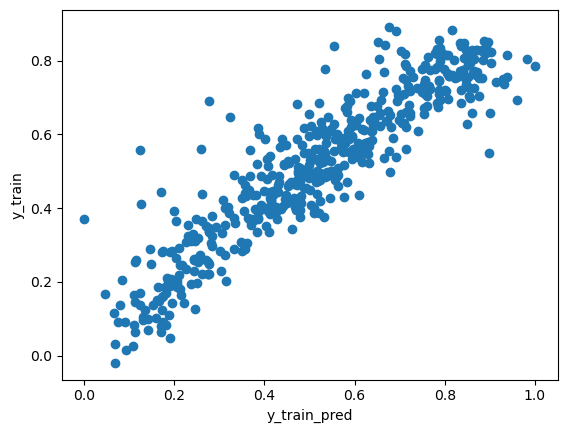

In [467]:
plt.scatter(y_train, y_train_pred)
plt.ylabel("y_train")
plt.xlabel("y_train_pred")
plt.show()

/var/folders/nb/hy0qfvps1j34grkj73401px40000gq/T/ipykernel_83778/2789945024.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

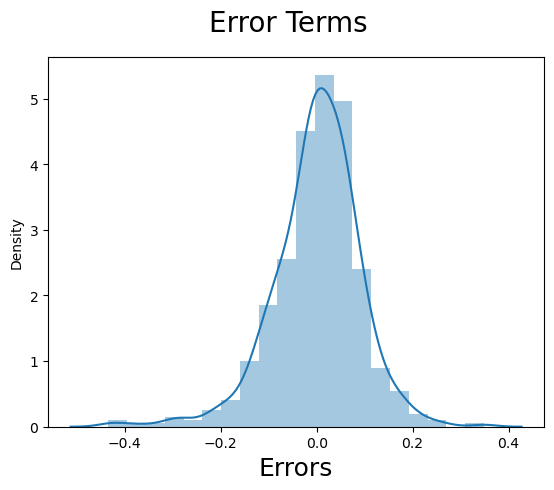

In [468]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Observation 9
- error distribution seems to be fine as its normally distributed with mean 0
- scatter plot suggests that predicted values are linearly corelated with original y_train data


# Prediction on test data

In [469]:
y_test = df_test.pop('cnt')
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [470]:
x_test = df_test[final_col]
x_test.head()

,temp,windspeed,season_spring,yr,mnth_jan,weathersit_misty,season_winter,mnth_jul,mnth_sept,weekday_sun,weathersit_light_rain
184,0.818182,0.121212,0,0,0,1,0,1,0,0,0
535,0.909091,0.181818,0,1,0,0,0,0,0,0,0
299,0.515152,0.363636,0,0,0,1,1,0,0,0,0
221,0.878788,0.363636,0,0,0,0,0,0,0,0,0
152,0.818182,0.545455,0,0,0,0,0,0,0,0,0


In [471]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lm.predict(x_test_sm)
y_test_pred.head()

184    0.469391
535    0.878810
299    0.405928
221    0.602392
152    0.547663
dtype: float64

In [472]:
def get_adjusted_r2_score(y_test, y_test_pred, x_test):
    r2 = r2_score(y_test, y_test_pred)
    n = x_test.shape[0]
    p = x_test.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

print("R2 : ", round(r2_score(y_test, y_test_pred), 2))
print("Adjusted R2 : ", round(get_adjusted_r2_score(y_test, y_test_pred, x_test), 2))

R2 :  0.8
Adjusted R2 :  0.79


#### Observation
- R-squared Value for test data is 0.80 and for train data the value is 0.83
- Adjusted R2 for test data is 0.83 and for train data the valus is 0.79

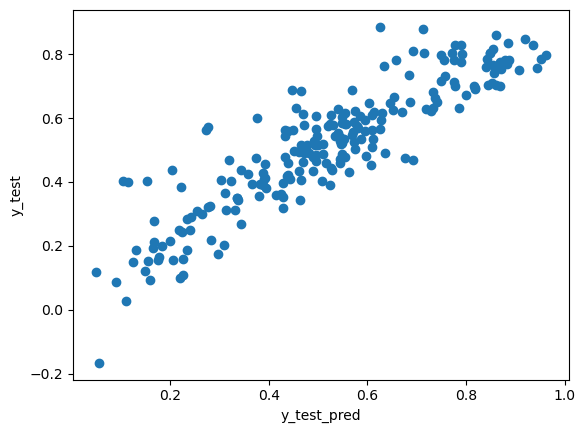

In [473]:
plt.scatter(y_test, y_test_pred)
plt.ylabel("y_test")
plt.xlabel("y_test_pred")
plt.show()

# Final Model Formula


#### cnt = 0.2816 + 0.4302 x temp - 0.1576 x windspeed - 0.1043 x season_spring + 0.2347 x yr - 0.0460 x mnth_jan - 0.0805 x weathersit_misty + 0.0405 x season_winter - 0.0646 x mnth_jul + 0.0539 x mnth_sept - 0.0454 x weekday_sun - 0.2896 x weathersit_light_rain